## Imputing Missing variables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore") 

from datetime import datetime
from IPython.display import display, Markdown


In [2]:
# Run this cell to display all output within each cell in Jupyter Notebook, 
# instead of just the last statement

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
## To read a locally saved CSV file:

df = pd.read_csv('../data/collisions_orig.csv', parse_dates=["INCDTTM"])

In [6]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.340472,47.608629,1,18600,18600,1785104,Matched,Intersection,29598.0,PIKE PL AND PIKE ST,NaN,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2004/10/14 00:00:00+00,2004-10-14 18:36:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Dark - Street Lights On,NaN,4288030.0,NaN,3,Vehicle backing hits pedestrian,0,0,N
1,-122.251788,47.508176,2,328272,329772,EA07021,Unmatched,Block,NaN,S PRENTICE ST BETWEEN 65TH AVE S AND 66TH AVE S,NEI,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/01/22 00:00:00+00,2020-01-22 00:00:00,Mid-Block (not related to intersection),12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
2,-122.328526,47.703180,3,328374,329874,EA09347,Matched,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,,NaN,1,Property Damage Only Collision,Angles,4,0,0,2,0,0,0,2020/01/05 00:00:00+00,2020-01-05 13:28:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.320383,47.539432,4,328985,330485,3857045,Matched,Intersection,34194.0,ELLIS AVE S AND S MYRTLE ST,,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020/02/13 00:00:00+00,2020-02-13 08:12:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
4,-122.366178,47.669041,5,328852,330352,EA12640,Unmatched,Block,NaN,8TH AVE NW BETWEEN NW MARKET ST AND NW 56TH ST,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020/02/08 00:00:00+00,2020-02-08 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y


In [7]:
df.shape

(220436, 40)

In [8]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [9]:
import hypertools as hyp
import scipy
from scipy.linalg import toeplitz
from copy import copy

%matplotlib inline

## Per team charter, Map all features to lower case

In [10]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [11]:
df

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar
0,-122.340472,47.608629,1,18600,18600,1785104,Matched,Intersection,29598.0,PIKE PL AND PIKE ST,NaN,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2004/10/14 00:00:00+00,2004-10-14 18:36:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Dark - Street Lights On,NaN,4288030.0,NaN,3,Vehicle backing hits pedestrian,0,0,N
1,-122.251788,47.508176,2,328272,329772,EA07021,Unmatched,Block,NaN,S PRENTICE ST BETWEEN 65TH AVE S AND 66TH AVE S,NEI,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/01/22 00:00:00+00,2020-01-22 00:00:00,Mid-Block (not related to intersection),12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
2,-122.328526,47.703180,3,328374,329874,EA09347,Matched,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,,NaN,1,Property Damage Only Collision,Angles,4,0,0,2,0,0,0,2020/01/05 00:00:00+00,2020-01-05 13:28:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.320383,47.539432,4,328985,330485,3857045,Matched,Intersection,34194.0,ELLIS AVE S AND S MYRTLE ST,,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020/02/13 00:00:00+00,2020-02-13 08:12:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
4,-122.366178,47.669041,5,328852,330352,EA12640,Unmatched,Block,NaN,8TH AVE NW BETWEEN NW MARKET ST AND NW 56TH ST,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020/02/08 00:00:00+00,2020-02-08 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220431,-122.316781,47.604778,220432,331612,333112,3847805,Matched,Block,NaN,12TH AVE BETWEEN E ALDER ST AND E TERRACE ST,,NaN,1,Property Damage Only Collision,Parked Car,3,0,0,3,0,0,0,2020/05/23 00:00:00+00,2020-05-23 04:22:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
220432,-122.307643,47.541919,220433,329749,331249,EA21262,Unmatched,Block,NaN,AIRPORT WAY S BETWEEN S HARDY ST AND S OTHELLO ST,,NaN,1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/03/06 00:00:00+00,2020-03-06 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
220433,-122.355898,47.629569,220434,330169,331669,EA24657,Matched,Intersection,275595.0,HIGHLAND DR AND HIGHLAND UPPER DR,,NaN,1,Property Damage Only Collision,Rear Ended,3,0,0,2,0,0,0,2020/03/04 00:00:00+00,2020-03-04 11:17:00,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
220434,-122.340467,47.609316,220435,331854,333354,EA11255,Matched,Block,NaN,1ST AVE BETWEEN PIKE ST AND PINE ST,,NaN,2,Injury Collision,Rear Ended,2,0,0,2,1,0,0,2020/01/27 00:00:00+00,2020-01-27 20:27:00,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,14,F

## Weather Related  Conditions
We know that weather, lightcond and roadcond each have about 12% missing data.  But are the same rows missing all three?  Or are the nans more randomly distributed throughout the data set?

In [12]:

count = df["weather"].isna().sum()
print(count)




26340


In [13]:
df.isnull().sum()

x                    7461
y                    7461
objectid                0
inckey                  0
coldetkey               0
reportno                0
status                  0
addrtype             3707
intkey             148920
location             4576
exceptrsncode      120403
exceptrsndesc      208690
severitycode            1
severitydesc            0
collisiontype       26152
personcount             0
pedcount                0
pedcylcount             0
vehcount                0
injuries                0
seriousinjuries         0
fatalities              0
incdate                 0
incdttm                 0
junctiontype        11936
sdot_colcode            1
sdot_coldesc            1
inattentionind     190249
underinfl           26132
weather             26340
roadcond            26260
lightcond           26429
pedrownotgrnt      215256
sdotcolnum          93231
speeding           210560
st_colcode           9413
st_coldesc          26152
seglanekey              0
crosswalkkey

In [14]:
df[['weather', 'lightcond', 'roadcond']].isnull().sum()

weather      26340
lightcond    26429
roadcond     26260
dtype: int64

In [15]:
criteria = df['weather'].isnull() & df['lightcond'].isnull() & df['roadcond'].isnull()
criteria.sum()

26195

So we can see that most of the missing data in one of these columns is also missing in the others.  From the large list of nans, we can see that st_colddesc, collisiontype and underinfl also have about the same number of nans.  Let's see if these also are the same obervations or different....

In [16]:
criteria = df['weather'].isnull() & df['lightcond'].isnull() & df['roadcond'].isnull() & df['collisiontype'].isnull()
criteria.sum()

26130

So yes with collision type exceptfor 130 of the observations...

In [17]:
criteria = df['weather'].isnull() & df['lightcond'].isnull() & df['roadcond'].isnull() & df['collisiontype'].isnull() & df['st_coldesc'].isnull()
criteria.sum()

26130

Didn't lose any there.  Addding underinfl to the mix...

In [18]:
criteria =  df['weather'].isnull() & df['lightcond'].isnull() & df['roadcond'].isnull() & df['collisiontype'].isnull() & df['st_coldesc'].isnull() & df['underinfl'].isnull()
criteria.sum()

26130

So there is something about the data collection system that makes these features have missing data. Let's see how these items are distributed over the years....

In [19]:
print(criteria)

0         False
1          True
2         False
3         False
4          True
          ...  
220431    False
220432     True
220433    False
220434    False
220435    False
Length: 220436, dtype: bool


How to impute missing data here?  Certainly we can use date and time of day (time of day may have a lesser accuracy because of buildings, direction, etc.) to impute weather and light conditions and to some extent roadcond.  For lightcond and roadcond, looking at location plus date and time may be a better set of indicators.  Let's take a look at when the underinfl collisions occur and also how many collisions even happen at the same day and time.  

In [20]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
df['year'] = pd.DatetimeIndex(df['incdate']).year
df.head()

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar,year
0,-122.340472,47.608629,1,18600,18600,1785104,Matched,Intersection,29598.0,PIKE PL AND PIKE ST,NaN,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2004/10/14 00:00:00+00,2004-10-14 18:36:00,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Dark - Street Lights On,NaN,4288030.0,NaN,3,Vehicle backing hits pedestrian,0,0,N,2004
1,-122.251788,47.508176,2,328272,329772,EA07021,Unmatched,Block,NaN,S PRENTICE ST BETWEEN 65TH AVE S AND 66TH AVE S,NEI,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/01/22 00:00:00+00,2020-01-22 00:00:00,Mid-Block (not related to intersection),12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,2020
2,-122.328526,47.703180,3,328374,329874,EA09347,Matched,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,,NaN,1,Property Damage Only Collision,Angles,4,0,0,2,0,0,0,2020/01/05 00:00:00+00,2020-01-05 13:28:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,2020
3,-122.320383,47.539432,4,328985,330485,3857045,Matched,Intersection,34194.0,ELLIS AVE S AND S MYRTLE ST,,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2020/02/13 00:00:00+00,2020-02-13 08:12:00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N,2020
4,-122.366178,47.669041,5,328852,330352,EA12640,Unmatched,Block,NaN,8TH AVE NW BETWEEN NW MARKET ST AND NW 56TH ST,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020/02/08 00:00:00+00,2020-02-08 00:00:00,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,2020


In [21]:
#counting criteria items grouped by year
df.loc[criteria].groupby('year').count()['objectid']

year
2003       1
2004    3340
2005     667
2006     281
2007     367
2008     266
2009    1317
2010     955
2011    1345
2012    2292
2013    2598
2014    1393
2015    1284
2016    2825
2017    1805
2018    2089
2019    2240
2020    1065
Name: objectid, dtype: int64

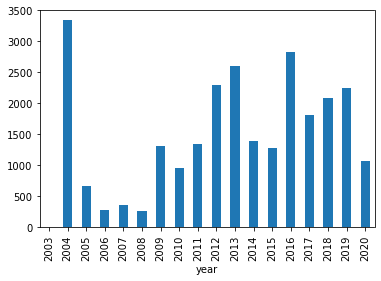

In [29]:
#plotting criteria items grouped by year
df.loc[criteria].groupby('year').count()['objectid'].plot.bar()

We can see that this group of missing nans (criteria) have occurred over the whole time period with the worst in 2004 and then big drop off in 2005-2008 and creeping up since....  An odd little mystery... 

Let's look at if this phenonmenon extends to even more features and then we can just drop those rows. 

Going through the head of the data above, I noticed that there were two with many other nans in different columns (st_coldesc, speeding, sdotcom, pedrownotgrnt, underinfl, inattentionind, collisiontype, intkey), but both of those were marked yes for hitparkedcar.  Wondering if that chart will look like the one above...


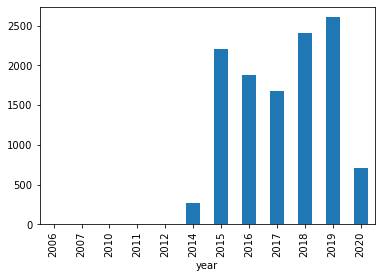

In [31]:
df.loc[df['hitparkedcar'] == 'Y'].groupby('year').count()['objectid'].plot.bar()

Ha!  That's interesting.  So it seems that it may be possible that hitparkedcar started being collected in a different way since 2014?  That difference which perhaps doesn't include taking down info from the other columns, contributed to criteria's growth over the last few years? But we've got over 2500 Y's on hitparkedcar in 2019, but less than 2500 in 2019 meet the 6 feature nan criteria above.  So this is not fully the situation.  However we need to be careful about removing rows with lots of nans because we don't want to remove those that may have Y on hitparkedcar...  

In [47]:
(criteria & (df['hitparkedcar'] == 'Y')).sum()

4678

In [50]:
df["hitparkedcar"].count()

220436

In [54]:
df['hitparkedcar'].value_counts()

N    208661
Y     11775
Name: hitparkedcar, dtype: int64

4678 of 11,775 have nans in the criteria group (almost 40%) 

In [55]:
#the dataframe of criteria plus hitparkedcar being "y"
df[(criteria & (df['hitparkedcar'] == 'Y'))]

,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar,year
1,-122.251788,47.508176,2,328272,329772,EA07021,Unmatched,Block,NaN,S PRENTICE ST BETWEEN 65TH AVE S AND 66TH AVE S,NEI,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/01/22 00:00:00+00,2020-01-22,Mid-Block (not related to intersection),12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,2020
4,-122.366178,47.669041,5,328852,330352,EA12640,Unmatched,Block,NaN,8TH AVE NW BETWEEN NW MARKET ST AND NW 56TH ST,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020/02/08 00:00:00+00,2020-02-08,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,2020
7,-122.321935,47.677954,8,332148,333648,EA40509,Unmatched,Block,NaN,NE 68TH ST BETWEEN OSWEGO PL NE AND WEEDIN PL NE,,NaN,1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2020/06/02 00:00:00+00,2020-06-02,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,2020
15,-122.344977,47.723212,16,328975,330475,EA15177,Unmatched,Intersection,35828.0,AURORA AVE N AND N 130TH ST,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020/02/15 00:00:00+00,2020-02-15,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,2020
20,-122.296357,47.544428,21,328231,329731,3856977,Unmatched,Block,NaN,S MORGAN ST BETWEEN 28TH AVE S AND 29TH AVE S,,NaN,1,Property Damage Only Collision,NaN,1,0,0,0,0,0,0,2020/01/23 00:00:00+00,2020-01-23,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220390,-122.341992,47.704140,220391,330157,331657,E983484,Unmatched,Block,NaN,STONE AVE N BETWEEN N 103RD ST AND N NORTHGATE...,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2019/11/17 00:00:00+00,2019-11-17,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,2019
220398,-122.331736,47.522420,220399,332023,333523,3838308,Unmatched,Block,NaN,2ND AVE S BETWEEN S HENDERSON ST AND DEAD END 6,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020/06/08 00:00:00+00,2020-06-08,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,2020
220399,-122.333098,47.609655,220400,332029,333529,3852423,Unmatched,Block,NaN,6TH AVE BETWEEN UNIVERSITY ST AND UNION ST,,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2020/06/07 00:00:00+00,2020-06-07,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,2020
220421,-122.357755,47.529181,220422,332021,333521,3838234,Unmatched,Block,NaN,18TH AVE SW BETWEEN SW ELMGROVE ST AND SW THIS...,,NaN,1,Property Damage Only Collision,NaN,1,0,0,0,0,0,0,2020/06/15 00:00:00+00,2020-06-15,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y,2020


## Imputing data
From here on down I was working on ways to impute the data with little success so value beyond here is marginal at best.

In [26]:
#check data types
df.dtypes

x                         float64
y                         float64
objectid                    int64
inckey                      int64
coldetkey                   int64
reportno                   object
status                     object
addrtype                   object
intkey                    float64
location                   object
exceptrsncode              object
exceptrsndesc              object
severitycode               object
severitydesc               object
collisiontype              object
personcount                 int64
pedcount                    int64
pedcylcount                 int64
vehcount                    int64
injuries                    int64
seriousinjuries             int64
fatalities                  int64
incdate                    object
incdttm            datetime64[ns]
junctiontype               object
sdot_colcode              float64
sdot_coldesc               object
inattentionind             object
underinfl                  object
weather       

In [29]:
df["incdate"] = df["incdate"].astype("datetime64") 

In [30]:
#looking at counts by date of criteria
df.loc[criteria].groupby('incdttm').count()['objectid']

incdttm
2003-10-06     1
2004-01-01     4
2004-01-02    14
2004-01-03     1
2004-01-04     3
              ..
2020-06-17     8
2020-06-18     4
2020-06-19     4
2020-06-20     1
2020-06-21     1
Name: objectid, Length: 5215, dtype: int64

In [31]:
df2 = df.set_index('incdate') #change index to incdate 
df2['2004-01-02'] #told pandas to find date in df2, isolating the rows I want to look at that show 14 instances from the criteria group.



,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,exceptrsncode,exceptrsndesc,severitycode,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar,year
incdate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,-122.317396,47.665687,3158,17954,17954,04002076,Unmatched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 50TH ST AND NE 52N...,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004-01-02,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,4002076.0,NaN,NaN,NaN,0,0,N,2004
2004-01-02,-122.286489,47.560108,3293,17087,17087,1779351,Unmatched,Block,NaN,RAINIER AVE S BETWEEN S ALASKA ST AND S ANGELI...,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004-01-02,Mid-Block (not related to intersection),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4002069.0,NaN,NaN,NaN,0,0,N,2004
2004-01-02,-122.344539,47.692012,3340,17261,17261,1778336,Matched,Intersection,37365.0,AURORA AVE N AND N 87TH ST,NaN,NaN,2,Injury Collision,Rear Ended,4,0,0,3,1,0,0,2004-01-02,At Intersection (but not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,0,Overcast,Dry,Dark - Street Lights On,NaN,4002004.0,NaN,14,From same direction - both going straight - on...,0,0,N,2004
2004-01-02,-122.345366,47.705053,3827,17732,17732,C628895,Matched,Block,NaN,N 105TH ST BETWEEN WHITMAN AVE N AND AURORA AVE N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,2004-01-02,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4002081.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2004
2004-01-02,-122.298592,47.713600,4190,17644,17644,1778742,Matched,Block,NaN,LAKE CITY WAY NE BETWEEN 27TH AVE NE AND NE 11...,NaN,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2004-01-02,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Ice,Daylight,NaN,4002062.0,NaN,13,From same direction - both going straight - bo...,0,0,N,2004
2004-01-02,-122.291174,47.713814,4493,18744,18744,1780528,Matched,Block,NaN,35TH AVE NE BETWEEN 34TH AVE NE AND 33RD PL NE,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2004-01-02,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Clear,Ice,Daylight,NaN,4002070.0,Y,32,One parked--one moving,0,0,N,2004
2004-01-02,-122.383109,47.547535,4544,18462,18462,1774836,Matched,Block,NaN,FAUNTLEROY WAY SW BETWEEN SW RAYMOND ST AND SW...,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2004-01-02,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Ice,Dawn,NaN,4002067.0,Y,32,One parked--one moving,0,0,N,2004
2004-01-02,-122.320416,47.624268,4687,18438,18438,1789805,Matched,Block,NaN,E MERCER ST BETWEEN BROADWAY E AND 10TH AVE E,NaN,NaN,1,Property Damage Only Collision,Other,5,0,0,2,0,0,0,2004-01-02,Driveway Junction,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,4002061.0,NaN,21,One car entering driveway access,0,0,N,2004
2004-01-02,-122.335094,47.708169,4771,18739,18739,1782596,Matched,Block,NaN,N NORTHGATE WAY BETWEEN BURKE AVE N AND MERIDI...,NaN,NaN,1,Property Damage Only Collision,Other,1,0,0,1,0,0,0,2004-01-02,Mid-Block (not related to intersection),28.0,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,0,Sleet/Hail/Freezing Rain,Ice,Dark - Street Lights On,NaN,4002013.0,NaN,50,Fixed object,0,0,N,2004


oddly when I do that incdttm loses its hour info.  Fun.  So I would like to impute by date and hour, but I don't know how so let's try just by date.  

In [71]:
df2.loc['2004-01-02']['weather'].value_counts()

Overcast                    30
Clear                       18
Raining                      9
Sleet/Hail/Freezing Rain     3
Unknown                      3
Snowing                      3
Name: weather, dtype: int64

In [ ]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
#weather_imputed = df2.apply(lambda x: x.fillna(x.value_counts().ind))
#df_most_common_imputed = colors.apply(lambda x: x.fillna(x.value_counts().index[0]))
#df_most_common_imputed

df2['weather'] = df2['weather'].apply(lambda x: x.fillna(x.value_counts().index[0])) 

In [69]:
df2.loc['2020-06-17']['weather'].count()

0

In [78]:
df3 = df.set_index('incdttm')
for date in df3.index:
    if df3.loc[date, 'weather'].count() > 0 :
        #df3['weather2'] = df3.loc[date,'weather'].apply(lambda x : x.fillna(x.value_counts().index[0]))
        print(date, df3.loc[date,'weather'])
    else :
        df3['weather2'] = 'bogus'

2004-02-04 00:00:00 incdttm
2004-02-04     Raining
2004-02-04     Raining
2004-02-04    Overcast
2004-02-04       Clear
2004-02-04       Clear
2004-02-04    Overcast
2004-02-04       Clear
2004-02-04         NaN
2004-02-04    Overcast
2004-02-04     Raining
2004-02-04     Raining
2004-02-04       Clear
2004-02-04       Clear
2004-02-04    Overcast
2004-02-04    Overcast
2004-02-04         NaN
2004-02-04    Overcast
2004-02-04    Overcast
2004-02-04       Clear
2004-02-04    Overcast
2004-02-04         NaN
2004-02-04     Raining
2004-02-04     Raining
2004-02-04       Clear
2004-02-04     Raining
2004-02-04         NaN
2004-02-04    Overcast
2004-02-04       Clear
2004-02-04     Raining
2004-02-04       Clear
2004-02-04       Clear
2004-02-04    Overcast
2004-02-04       Clear
2004-02-04     Unknown
2004-02-04       Clear
2004-02-04    Overcast
2004-02-04     Raining
2004-02-04     Unknown
2004-02-04       Clear
2004-02-04       Clear
2004-02-04       Clear
2004-02-04    Overcast
2004-0

TypeError: count() takes at least 1 argument (0 given)

In [66]:
df2.groupby('incdate')['weather'].count()

incdate
2003-10-06     0
2004-01-01    26
2004-01-02    66
2004-01-03    20
2004-01-04    14
              ..
2020-06-17     0
2020-06-18     0
2020-06-19     0
2020-06-20     0
2020-06-21     0
Name: weather, Length: 6018, dtype: int64